In [10]:
# If you want the figures to appear in the notebook, 
# and you want to interact with them, use
# %matplotlib notebook

# If you want the figures to appear in the notebook, 
# and you don't want to interact with them, use
# %matplotlib inline

# If you want the figures to appear in separate windows, use
# %matplotlib qt5

# tempo switch from one to another, you have to select Kernel->Restart

%matplotlib inline

from modsim import *

In [11]:
"""
    h: heat transfer coefficient, 10 in this case, for static air cooling
    (related website: https://link.springer.com/article/10.1007/s00231-015-1652-x)
    k_f: the cryoscopic constant, For water, KF = 1.853 K·kg/mol;
    num_ions: the van 't Hoff factor (number of ion particles per individual molecule of solute, e.g. i = 2 for NaCl, 3 for BaCl2).
    (related website: https://en.wikipedia.org/wiki/Freezing-point_depression)
    
    max_soluability for NaCl: 35.65g/mol = 6.15 mole/kg
    A: 686.966 cm^2 = 0.0686966 m^2, surface area of a 500mL water bottle
    (related website: https://www.bottleyourbrand.com/answers/sizing/arrowhead-water-bottle-label-size
    
    T_init: -25Celsius, Initial Temperature of the water bottle, set in Northern Siberia
    (related website: https://en.wikipedia.org/wiki/Siberia)
    k_water: 0.0387
    (related_website: http://jwilson.coe.uga.edu/EMAT6680Fa2014/Gieseking/Exploration%2012/Newton%27s%20Law%20of%20Cooling.htm)
    k_ice: twice k_water
"""
k_f = 1.853 #K*Kg/mol
num_ions = 2 #Number of Ions in NaCl
A = 0.0686966
T_init = -25
T_env = 20
T_end = 4 #Temprature 
k_water, k_ice = 0.0387, 0.0774
molality_array = linspace(0, 6.147, 10)
freezing_point_array = 0 - molality_array * k_f * num_ions
freezing_point_array

array([  0.      ,  -2.531198,  -5.062396,  -7.593594, -10.124792,
       -12.65599 , -15.187188, -17.718386, -20.249584, -22.780782])

In [45]:
def newton_cooling(system, t):
    """Calculates the change in temperature over time"""
    e=2.71828
    T=system.T
    T = system.T_env + (system.T_init - system.T_env)*e**(-system.k*t)
    
    system.T=T
    return system.T   

-10.559107226740569

In [46]:
def run_simulation(system, t):
    results=TimeSeries()
    for i in range(t):
        x=newton_cooling(system, i)
        results[i]=x
    return results

run_simulation(ice, 6)

,value
0,-25.000000
1,-21.648383
2,-18.546396
3,-15.675445
4,-13.018325
5,-10.559107


In [50]:
ice = System(T_init=-25, T_env=20, T_end=4, k=k_ice, T=0)
water = System(T_init=0, T_env=20, T_end=4, k=k_water, T=0)

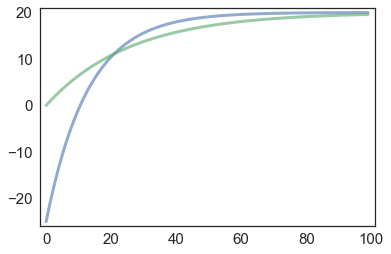

In [51]:
def plot_results(system, t):
    y=run_simulation(system, t)
    plot(y)
    
plot_results(ice, 100)
plot_results(water, 100)

In [4]:
def stop_freeze(array):
    if 

IndentationError: unexpected indent (<ipython-input-4-e2b0ffe35d08>, line 2)

In [96]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
    
    Add a TimeFrame to the System: results
    
    system: System object
    update_func: function that updates state
    """
    
    frame = TimeFrame(columns=system.init.index)
    frame.loc[t0] = system.init
    ts = linrange(system.t0, system.t_end-system.dt, system.dt)
    
    for t in ts:
        frame.loc[t+dt] = update_func(frame.loc[t], system)
    
    system.results = frame

In [97]:
def final_temp(system):
    """Final temperature.
    
    If system has no results, return initial temp.
    
    system: System object.
    
    returns: temperature (degC)
    """    
    if hasattr(system, 'results'):
        return system.results.temp[system.t_end]
    else:
        return system.init.temp

,value
init,temp 90 dtype: int64
volume,300
r,0.01
T_env,22
t0,0
t_end,30
dt,1
t_amb,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."


72.299625390403094

init                    temp    2.061622e+60
dtype: float64
volume                                          1.26661e+76
r                                                   72.2996
T_env                                           3.15564e+41
t0                                                       90
t_end                                           5.06348e+45
dt                                                       22
t_amb     [90.0, 22.0, 90.0, 73014444054.0, 1.4000596982...
dtype: object

21.279350309321327

22.0

IndexError: index out of bounds

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices